In [32]:
#1) Load the dataset into python environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Use pandas to read the CSV file
data = pd.read_csv('D:/ictak_dsa/titanic_dataset.csv')
df = pd.DataFrame(data)

In [8]:
#to find missing values

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# 2. Make 'PassengerId' as the index column
data.set_index('PassengerId', inplace=True)
data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
# 3. Check the basic details of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [33]:
# 4. Fill in all the missing values present in all the columns in the dataset
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('', inplace=True)  # Filling with empty string for 'Cabin'
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)



In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

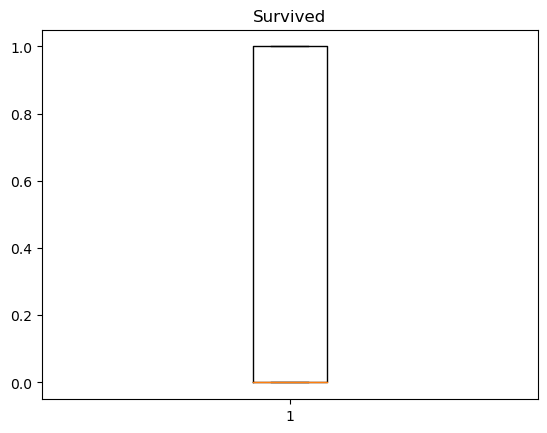

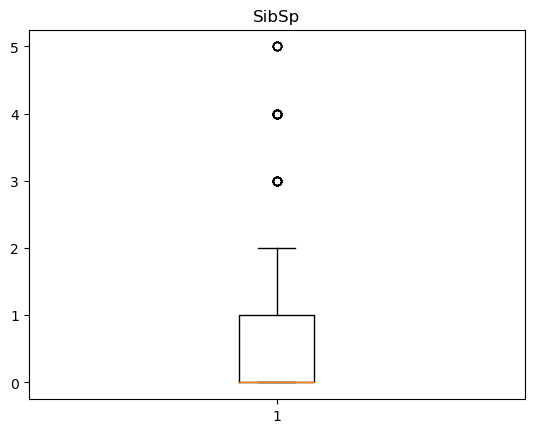

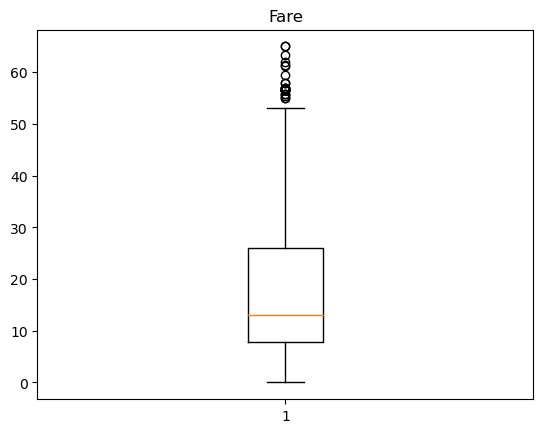

In [39]:
# 5. Check and handle outliers in at least 3 columns in the dataset
# Let's check and handle outliers in 'Survived', 'SibSp', and 'Fare'
y=['Survived', 'SibSp','Fare']
for i in y:
    plt.figure(i)
    plt.boxplot(data[i])
    plt.title(i)

In [31]:
#outlier handling in Fare

Q1=np.percentile(data['Fare'],25,method='midpoint')
Q2=np.percentile(data['Fare'],50,method='midpoint')
Q3=np.percentile(data['Fare'],75,method='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
outlier=[]
for x in data['Fare']:
    if ((x>up_limit)or (x<low_limit)):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [37]:
data1=data.loc[data['Fare']>up_limit].index
data.drop(data1,inplace=True)

In [38]:
# 6. Do min-max scaling on the feature set (Take 'Survived' as the target)
scaler = MinMaxScaler()
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

# Print the modified dataset
print(df)

     PassengerId  Survived  Pclass  \
0              1         0     1.0   
1              2         1     0.0   
2              3         1     1.0   
3              4         1     0.0   
4              5         0     1.0   
..           ...       ...     ...   
886          887         0     0.5   
887          888         1     0.0   
888          889         0     1.0   
889          890         1     0.0   
890          891         0     1.0   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male  0.271174   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.472229   
2                               Heikkinen, Miss. Laina  female  0.321438   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.434531   
4                             Allen, Mr. William Henry    male  0.434531   
..                                                 ...     ...       ...   
886        